<a href="https://colab.research.google.com/github/d1egojr/challenge-allura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos

In [ ]:
facturacion_tienda1 = tienda1['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

print(f"Facturación Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:.2f}")

facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


# 2. Ventas por categoría

En este paso debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
def ventas_por_categoria(tienda, nombre_tienda):
	ventas = tienda['Categoría del Producto'].tolist()
	ventas_set = set(ventas)
	dictio = {categoria: ventas.count(categoria) for categoria in ventas_set}
	dictio_ordenado = dict(sorted(dictio.items(), key=lambda item: item[1], reverse=True))

	print(f"Las ventas por categoría en la {nombre_tienda} son:")
	for categoria,cantidad in dictio_ordenado.items():
 		print(f"  {categoria}: {cantidad} unidades")

	total_categorias = sum(dictio.values())
	print(f"Ventas totales en {nombre_tienda}: {total_categorias} unidades")


ventas_por_categoria(tienda1, "Tienda 1")
print()
ventas_por_categoria(tienda2, "Tienda 2")
print()
ventas_por_categoria(tienda3, "Tienda 3")
print()
ventas_por_categoria(tienda4, "Tienda 4")

Las ventas por categoría en la Tienda 1 son:
  Muebles: 465 unidades
  Electrónicos: 448 unidades
  Juguetes: 324 unidades
  Electrodomésticos: 312 unidades
  Deportes y diversión: 284 unidades
  Instrumentos musicales: 182 unidades
  Libros: 173 unidades
  Artículos para el hogar: 171 unidades
Ventas totales en Tienda 1: 2359 unidades

Las ventas por categoría en la Tienda 2 son:
  Muebles: 442 unidades
  Electrónicos: 422 unidades
  Juguetes: 313 unidades
  Electrodomésticos: 305 unidades
  Deportes y diversión: 275 unidades
  Instrumentos musicales: 224 unidades
  Libros: 197 unidades
  Artículos para el hogar: 181 unidades
Ventas totales en Tienda 2: 2359 unidades

Las ventas por categoría en la Tienda 3 son:
  Muebles: 499 unidades
  Electrónicos: 451 unidades
  Juguetes: 315 unidades
  Electrodomésticos: 278 unidades
  Deportes y diversión: 277 unidades
  Libros: 185 unidades
  Instrumentos musicales: 177 unidades
  Artículos para el hogar: 177 unidades
Ventas totales en Tienda 3

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
def calificacion_promedio(tienda, nombre_tienda):
    promedio = tienda['Calificación'].mean()
    print(f"Calificación promedio en Tienda {nombre_tienda}: {promedio:.2f}")

calificacion_promedio(tienda1, 1)
calificacion_promedio(tienda2, 2)
calificacion_promedio(tienda3, 3)
calificacion_promedio(tienda4, 4)


Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
def ventas_por_producto(tienda, nombre_tienda):
	ventas = tienda['Producto'].tolist()
	ventas_set = set(ventas)
	dictio = {categoria: ventas.count(categoria) for categoria in ventas_set}
	dictio_ordenado = dict(sorted(dictio.items(), key=lambda item: item[1], reverse=True))

	print(f"Los 5 productos mas vendidos en la {nombre_tienda} son:")
	for categoria,cantidad in list(dictio_ordenado.items())[:5]:
 		print(f"  {categoria}: {cantidad} unidades")

	print(f"Los 5 productos menos vendidos en la {nombre_tienda} son:")
	for categoria,cantidad in list(dictio_ordenado.items())[-5:]:
 		print(f"  {categoria}: {cantidad} unidades")


ventas_por_producto(tienda1, "Tienda 1")
print()
ventas_por_producto(tienda2, "Tienda 2")
print()
ventas_por_producto(tienda3, "Tienda 3")
print()
ventas_por_producto(tienda4, "Tienda 4")

Los 5 productos mas vendidos en la Tienda 1 son:
  Microondas: 60 unidades
  Armario: 60 unidades
  TV LED UHD 4K: 60 unidades
  Secadora de ropa: 58 unidades
  Bloques de construcción: 56 unidades
Los 5 productos menos vendidos en la Tienda 1 son:
  Ciencia de datos con Python: 39 unidades
  Pandereta: 36 unidades
  Olla de presión: 35 unidades
  Celular ABXY: 33 unidades
  Auriculares con micrófono: 33 unidades

Los 5 productos mas vendidos en la Tienda 2 son:
  Iniciando en programación: 65 unidades
  Microondas: 62 unidades
  Batería: 61 unidades
  Guitarra acústica: 58 unidades
  Pandereta: 58 unidades
Los 5 productos menos vendidos en la Tienda 2 son:
  Auriculares: 37 unidades
  Sillón: 35 unidades
  Mesa de comedor: 34 unidades
  Impresora: 34 unidades
  Juego de mesa: 32 unidades

Los 5 productos mas vendidos en la Tienda 3 son:
  Kit de bancas: 57 unidades
  Mesa de comedor: 56 unidades
  Cama king: 56 unidades
  Mesa de noche: 55 unidades
  Set de ollas: 55 unidades
Los 5 pr

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
def costo_envio_promedio(tienda, nombre_tienda):
    promedio = tienda['Costo de envío'].mean()
    print(f"Costo de envío promedio en Tienda {nombre_tienda}: {promedio:.2f}")

costo_envio_promedio(tienda1, 1)
costo_envio_promedio(tienda2, 2)
costo_envio_promedio(tienda3, 3)
costo_envio_promedio(tienda4, 4)

Costo de envío promedio en Tienda 1: 26018.61
Costo de envío promedio en Tienda 2: 25216.24
Costo de envío promedio en Tienda 3: 24805.68
Costo de envío promedio en Tienda 4: 23459.46


# **6.Visualización**

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.


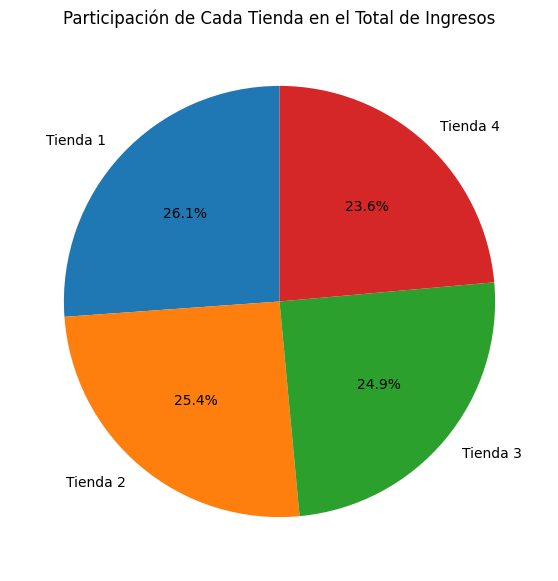

In [ ]:
import matplotlib.pyplot as plt

ingresos_totales = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
etiquetas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#Pie
plt.figure(figsize=(7,7))
plt.pie(ingresos_totales, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.show()


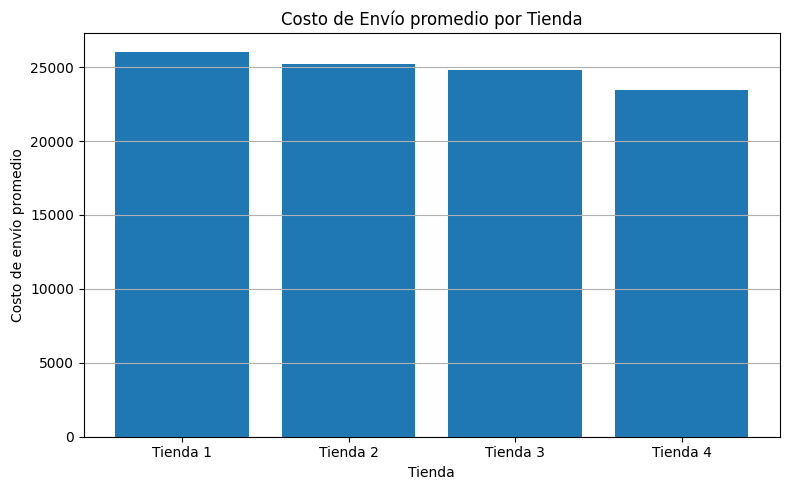

In [ ]:
def costo_promedio(tienda):
  promedio = tienda['Costo de envío'].mean()
  return promedio

costo_envio = [costo_promedio(tienda1), costo_promedio(tienda2), costo_promedio(tienda3), costo_promedio(tienda4)]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8,5))
plt.bar(tiendas,costo_envio)
plt.title('Costo de Envío promedio por Tienda')
plt.ylabel('Costo de envío promedio')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



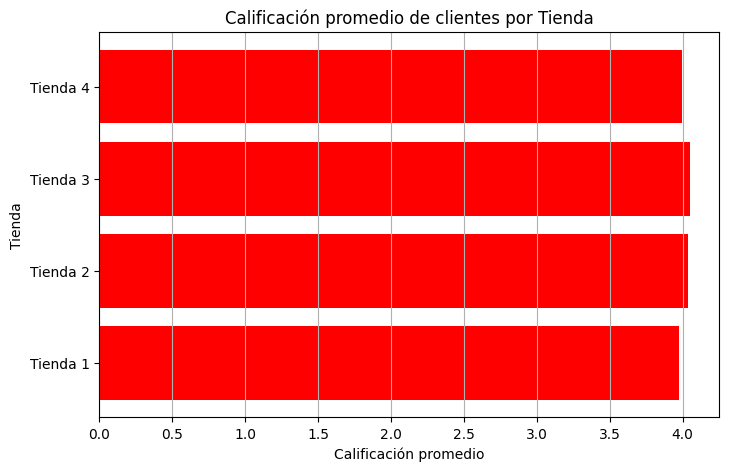

In [ ]:
def calificacion(tienda):
    promedio = tienda['Calificación'].mean()
    return promedio

calificacion_tienda = [calificacion(tienda1), calificacion(tienda2), calificacion(tienda3), calificacion(tienda4)]

plt.figure(figsize=(8,5))
plt.barh(tiendas, calificacion_tienda, color = "red")
plt.title('Calificación promedio de clientes por Tienda')
plt.ylabel('Tienda')
plt.xlabel('Calificación promedio')
plt.grid(axis='x')
plt.show()


# Calculos **Adicionales**

In [ ]:
unidades_vendidas = [2359,2359,2359,2358]
'''ingresos_totales = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
  costo_envio = [costo_promedio(tienda1), costo_promedio(tienda2), costo_promedio(tienda3), costo_promedio(tienda4)]
  etiquetas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']'''

def ganancia():
  for i in range(len(unidades_vendidas)):
    ganancia_tienda = ingresos_totales[i] - (costo_envio[i] * unidades_vendidas[i])
    print(f'La ganancia de la {etiquetas[i]} es de $ {ganancia_tienda}')

ganancia()


La ganancia de la Tienda 1 es de $ 1089502500.0
La ganancia de la Tienda 2 es de $ 1056858400.0
La ganancia de la Tienda 3 es de $ 1039503000.0
La ganancia de la Tienda 4 es de $ 983058300.0


# 7. **Informe Final**

Con base en los análisis realizados y los gráficos generados, debo concluir que la tienda que el Sr. Juan debe vender es la tienda 4.

Mi recomendación se basa en que esa tienda es la que menor flujo de ingresos genera, y a pesar de tener el más bajo coste de envio promedio, la ganancia que genera es tambien la mas baja de las 4 tiendas en análisis.

Además la tienda 4 es la que obtuvo menor calificación promedio por parte de los clientes, indicando que el nivel de satisfacción del cliente es el mas bajo de las 4.




